In [222]:
import requests
import pandas as pd
from functools import reduce
import operator
import collections
import requests
from bs4 import BeautifulSoup
import seaborn as sns



In [231]:
url_liga='https://es.wikipedia.org/wiki/Primera_División_de_España_2021-22'
html_liga = requests.get(url_liga)

In [232]:
#soup
soup_liga = BeautifulSoup(html_liga.content, "html.parser")

In [233]:
liga = soup_liga.findAll("table")[-52]

In [234]:
ligaesp = []
for f in liga.find_all("tr"): #LISTA CON LAS FILAS DE LA TABLA
    fila = [elemento for elemento in f.find_all("td")] # ELEMENTOS DENTRO DE CADA FILA
    if len(fila) > 1:
        diccionario_2 = {"Equipo": fila[0].text,
                      "Puntos":int(fila[1].text)}
        ligaesp.append(diccionario_2)

In [235]:
laliga = pd.DataFrame(ligaesp)

In [236]:
laliga["Equipo"] = laliga["Equipo"].replace({'Real Sociedad\n':"RSO", "Real Madrid C. F.\n":"RMD", "Sevilla F. C.\n": "SEV",
                               "Atlético de Madrid\n":"ATM", "Real Betis Balompié\n":"BET", "Getafe C. F.\n":"GET",
                               "Levante U. D.\n":"LEV", "Deportivo Alavés\n":"ALA", "Elche C. F.\n": "ELC",
                               "R. C. Celta de Vigo\n":"CEL", 'Cádiz C. F.\n':"CAD", "Granada C. F.\n":"GRA", "Villarreal C. F.\n": "VIL",
                               "R. C. D. Mallorca\n":"MAL", "Valencia C. F.\n":"VAL", "R. C. D. Espanyol\n":"ESP",
                               "F. C. Barcelona\n":"FCB", "Athletic Club\n":"ATH","Rayo Vallecano\n": "RYV", "C. A. Osasuna\n": "OSA"}) 

In [237]:
laliga.tail()

,Equipo,Puntos
15,CAD,12
16,GRA,11
17,ELC,10
18,LEV,6
19,GET,6


In [188]:
laliga["Equipo"].unique()

array(['RSO', 'RMD', 'SEV', 'ATM', 'BET', 'RYV', 'OSA', 'ATH', 'FCB',
       'VAL', 'ESP', 'VIL', 'MAL', 'ALA', 'CEL', 'CAD', 'GRA', 'ELC',
       'LEV', 'GET'], dtype=object)

In [12]:
# Nos traemos el data set 
f = pd.read_csv("players_22.csv",encoding = "ISO-8859-1")

/Users/macniacos/Desktop/Ironhack/anaconda3/envs/ironhack/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning:

Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.



In [13]:
f.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos JÃºnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [14]:
#Seleccionamos las columnas que nos interesan
selected_columns = f[["short_name", "overall","club_name","league_name"]]
f2 = selected_columns.copy()
f2.head()

,short_name,overall,club_name,league_name
0,L. Messi,93,Paris Saint-Germain,French Ligue 1
1,R. Lewandowski,92,FC Bayern MÃ¼nchen,German 1. Bundesliga
2,Cristiano Ronaldo,91,Manchester United,English Premier League
3,Neymar Jr,91,Paris Saint-Germain,French Ligue 1
4,K. De Bruyne,91,Manchester City,English Premier League


In [15]:
#Nos quedamos con los jugadores de la liga española, y eliminamos la columna que hace referencia a la liga
f3 = f2[f2["league_name"] == "Spain Primera Division"]
f3.drop(["league_name"], axis=1, inplace=True)

/Users/macniacos/Desktop/Ironhack/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
f3["club_name"].unique()

array(['AtlÃ©tico de Madrid', 'FC Barcelona', 'Real Madrid CF',
       'Villarreal CF', 'Sevilla FC', 'Real Sociedad', 'RC Celta de Vigo',
       'Real Betis BalompiÃ©', 'Athletic Club de Bilbao', 'Valencia CF',
       'Levante UniÃ³n Deportiva', 'Granada CF', 'Getafe CF',
       'Deportivo AlavÃ©s', 'RCD Espanyol de Barcelona', 'Elche CF',
       'CA Osasuna', 'CÃ¡diz CF', 'Rayo Vallecano', 'RCD Mallorca'],
      dtype=object)

In [17]:
#Sustituimos los nombres de los equipos por los mismos códigos anteriores
f3["club_name"] = f3["club_name"].replace({'Real Sociedad':"RSO", "Real Madrid CF":"RMD", "Sevilla FC": "SEV",
                               "AtlÃ©tico de Madrid":"ATM", "Real Betis BalompiÃ©":"BET", "Getafe CF":"GET",
                               "Levante UniÃ³n Deportiva":"LEV", "Deportivo AlavÃ©s":"ALA", "Elche CF": "ELC",
                               "RC Celta de Vigo":"CEL", 'CÃ¡diz CF':"CAD", "Granada CF":"GRA", "Villarreal CF": "VIL",
                               "RCD Mallorca":"MAL", "Valencia CF":"VAL", "RCD Espanyol de Barcelona":"ESP",
                               "FC Barcelona":"FCB", "Athletic Club de Bilbao":"ATH","Rayo Vallecano": "RYV", "CA Osasuna": "OSA"}) 

<ipython-input-17-fc0f574ea5ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
f3["club_name"].unique()

array(['ATM', 'FCB', 'RMD', 'VIL', 'SEV', 'RSO', 'CEL', 'BET', 'ATH',
       'VAL', 'LEV', 'GRA', 'GET', 'ALA', 'ESP', 'ELC', 'OSA', 'CAD',
       'RYV', 'MAL'], dtype=object)

In [199]:
f3

,short_name,overall,club_name
5,J. Oblak,91,ATM
8,M. ter Stegen,90,FCB
11,K. Benzema,89,RMD
12,T. Courtois,89,RMD
14,Casemiro,89,RMD
...,...,...,...
16775,Diego Bri,58,ELC
16833,W. Suzuki,58,VAL
16965,Alex RodrÃ­guez,58,GET
16966,A. Akurugu,58,GET


In [202]:
# Agrupamos los jugadores en sus equipos
ATM1 = f3[f3["club_name"] == "ATM"]
FCB1 = f3[f3["club_name"] == "FCB"]
RMD1 = f3[f3["club_name"] == "RMD"]
VIL1 = f3[f3["club_name"] == "VIL"]
SEV1 = f3[f3["club_name"] == "SEV"]
RSO1 = f3[f3["club_name"] == "RSO"]
CEL1 = f3[f3["club_name"] == "CEL"]
BET1 = f3[f3["club_name"] == "BET"]
ATH1 = f3[f3["club_name"] == "ATH"]
VAL1 = f3[f3["club_name"] == "VAL"]
LEV1 = f3[f3["club_name"] == "LEV"]
GRA1 = f3[f3["club_name"] == "GRA"]
GET1 = f3[f3["club_name"] == "GET"]
ALA1 = f3[f3["club_name"] == "ALA"]
ESP1 = f3[f3["club_name"] == "ESP"]
ELC1 = f3[f3["club_name"] == "ELC"]
OSA1 = f3[f3["club_name"] == "OSA"]
CAD1 = f3[f3["club_name"] == "CAD"]
RYV1 = f3[f3["club_name"] == "RYV"]
MAL1 = f3[f3["club_name"] == "MAL"]

In [204]:
RMD1.head()

,short_name,overall,club_name
11,K. Benzema,89,RMD
12,T. Courtois,89,RMD
14,Casemiro,89,RMD
24,T. Kroos,88,RMD
32,L. ModriÄ,87,RMD


In [257]:
def nombres(x)
laliga["Equipo"] = laliga["Equipo"].replace({'Real Sociedad\n':"RSO", "Real Madrid C. F.\n":"RMD", "Sevilla F. C.\n": "SEV",
                               "Atlético de Madrid\n":"ATM", "Real Betis Balompié\n":"BET", "Getafe C. F.\n":"GET",
                               "Levante U. D.\n":"LEV", "Deportivo Alavés\n":"ALA", "Elche C. F.\n": "ELC",
                               "R. C. Celta de Vigo\n":"CEL", 'Cádiz C. F.\n':"CAD", "Granada C. F.\n":"GRA", "Villarreal C. F.\n": "VIL",
                               "R. C. D. Mallorca\n":"MAL", "Valencia C. F.\n":"VAL", "R. C. D. Espanyol\n":"ESP",
                               "F. C. Barcelona\n":"FCB", "Athletic Club\n":"ATH","Rayo Vallecano\n": "RYV", "C. A. Osasuna\n": "OSA"}) 

,short_name,overall,club_name,average
11,K. Benzema,89,RMD,85.909091
12,T. Courtois,89,RMD,85.909091
14,Casemiro,89,RMD,85.909091
24,T. Kroos,88,RMD,85.909091
32,L. ModriÄ,87,RMD,85.909091
75,E. Hazard,85,RMD,85.909091
87,Carvajal,85,RMD,85.909091
107,D. Alaba,84,RMD,85.909091
182,Marco Asensio,83,RMD,85.909091
187,F. Mendy,83,RMD,85.909091


In [205]:
# Actualizamos los equipos seleccionando solos sus 11 mejores jugadores
RMD2 = RMD1.nlargest(11,'overall')
ATM2 = ATM1.nlargest(11,'overall')
FCB2 = FCB1.nlargest(11,'overall')
VIL2 = VIL1.nlargest(11,'overall')
SEV2 = SEV1.nlargest(11,'overall')
RSO2 = RSO1.nlargest(11,'overall')
CEL2 = CEL1.nlargest(11,'overall')
BET2 = BET1.nlargest(11,'overall')
ATH2 = ATH1.nlargest(11,'overall')
VAL2 = VAL1.nlargest(11,'overall')
LEV2 = LEV1.nlargest(11,'overall')
GRA2 = GRA1.nlargest(11,'overall')
GET2 = GET1.nlargest(11,'overall')
ALA2 = ALA1.nlargest(11,'overall')
ESP2 = ESP1.nlargest(11,'overall')
ELC2 = ELC1.nlargest(11,'overall')
OSA2 = OSA1.nlargest(11,'overall')
CAD2 = CAD1.nlargest(11,'overall')
RYV2 = RYV1.nlargest(11,'overall')
MAL2 = MAL1.nlargest(11,'overall')

In [208]:
RMD2.head()

,short_name,overall,club_name
11,K. Benzema,89,RMD
12,T. Courtois,89,RMD
14,Casemiro,89,RMD
24,T. Kroos,88,RMD
32,L. ModriÄ,87,RMD


In [209]:
# Le añadimos una columna con la media del equipo
RMD2['average'] = RMD2["overall"].mean()
ATM2['average'] = ATM2["overall"].mean()
FCB2['average'] = FCB2["overall"].mean()
VIL2['average'] = VIL2["overall"].mean()
SEV2['average'] = SEV2["overall"].mean()
RSO2['average'] = RSO2["overall"].mean()
CEL2['average'] = CEL2["overall"].mean()
BET2['average'] = BET2["overall"].mean()
ATH2['average'] = ATH2["overall"].mean()
VAL2['average'] = VAL2["overall"].mean()
LEV2['average'] = LEV2["overall"].mean()
GRA2['average'] = GRA2["overall"].mean()
GET2['average'] = GET2["overall"].mean()
ALA2['average'] = ALA2["overall"].mean()
ESP2['average'] = ESP2["overall"].mean()
ELC2['average'] = ELC2["overall"].mean()
OSA2['average'] = OSA2["overall"].mean()
CAD2['average'] = CAD2["overall"].mean()
RYV2['average'] = RYV2["overall"].mean()
MAL2['average'] = MAL2["overall"].mean()

In [210]:
RMD2.head()

,short_name,overall,club_name,average
11,K. Benzema,89,RMD,85.909091
12,T. Courtois,89,RMD,85.909091
14,Casemiro,89,RMD,85.909091
24,T. Kroos,88,RMD,85.909091
32,L. ModriÄ,87,RMD,85.909091


In [211]:
# Ahora nos quedamos con sólo una línea (lo que queremos es la media del equipo)
RMD3 = RMD2.nlargest(1,'overall')
ATM3 = ATM2.nlargest(1,'overall')
FCB3 = FCB2.nlargest(1,'overall')
VIL3 = VIL2.nlargest(1,'overall')
SEV3 = SEV2.nlargest(1,'overall')
RSO3 = RSO2.nlargest(1,'overall')
CEL3 = CEL2.nlargest(1,'overall')
BET3 = BET2.nlargest(1,'overall')
ATH3 = ATH2.nlargest(1,'overall')
VAL3 = VAL2.nlargest(1,'overall')
LEV3 = LEV2.nlargest(1,'overall')
GRA3 = GRA2.nlargest(1,'overall')
GET3 = GET2.nlargest(1,'overall')
ALA3 = ALA2.nlargest(1,'overall')
ESP3 = ESP2.nlargest(1,'overall')
ELC3 = ELC2.nlargest(1,'overall')
OSA3 = OSA2.nlargest(1,'overall')
CAD3 = CAD2.nlargest(1,'overall')
RYV3 = RYV2.nlargest(1,'overall')
MAL3 = MAL2.nlargest(1,'overall')

In [212]:
RMD3

,short_name,overall,club_name,average
11,K. Benzema,89,RMD,85.909091


In [214]:
# Elimnamos las columnas del nombre del mejor jugador del equipo y de su media, 
# quedandonosos sólo con las columnas del código del equipo y la media del mismo

RMD3.drop(["short_name"] , axis=1, inplace=True)
RMD3.drop(["overall"] , axis=1, inplace=True)
FCB3.drop(["short_name"] , axis=1, inplace=True)
FCB3.drop(["overall"] , axis=1, inplace=True)
ATM3.drop(["short_name"] , axis=1, inplace=True)
ATM3.drop(["overall"] , axis=1, inplace=True)
VIL3.drop(["short_name"] , axis=1, inplace=True)
VIL3.drop(["overall"] , axis=1, inplace=True)
SEV3.drop(["short_name"] , axis=1, inplace=True)
SEV3.drop(["overall"] , axis=1, inplace=True)
RSO3.drop(["short_name"] , axis=1, inplace=True)
RSO3.drop(["overall"] , axis=1, inplace=True)
CEL3.drop(["short_name"] , axis=1, inplace=True)
CEL3.drop(["overall"] , axis=1, inplace=True)
BET3.drop(["short_name"] , axis=1, inplace=True)
BET3.drop(["overall"] , axis=1, inplace=True)
ATH3.drop(["short_name"] , axis=1, inplace=True)
ATH3.drop(["overall"] , axis=1, inplace=True)
VAL3.drop(["short_name"] , axis=1, inplace=True)
VAL3.drop(["overall"] , axis=1, inplace=True)
LEV3.drop(["short_name"] , axis=1, inplace=True)
LEV3.drop(["overall"] , axis=1, inplace=True)
GRA3.drop(["short_name"] , axis=1, inplace=True)
GRA3.drop(["overall"] , axis=1, inplace=True)
GET3.drop(["short_name"] , axis=1, inplace=True)
GET3.drop(["overall"] , axis=1, inplace=True)
ALA3.drop(["short_name"] , axis=1, inplace=True)
ALA3.drop(["overall"] , axis=1, inplace=True)
ESP3.drop(["short_name"] , axis=1, inplace=True)
ESP3.drop(["overall"] , axis=1, inplace=True)
ELC3.drop(["short_name"] , axis=1, inplace=True)
ELC3.drop(["overall"] , axis=1, inplace=True)
OSA3.drop(["short_name"] , axis=1, inplace=True)
OSA3.drop(["overall"] , axis=1, inplace=True)
CAD3.drop(["short_name"] , axis=1, inplace=True)
CAD3.drop(["overall"] , axis=1, inplace=True)
RYV3.drop(["short_name"] , axis=1, inplace=True)
RYV3.drop(["overall"] , axis=1, inplace=True)
MAL3.drop(["short_name"] , axis=1, inplace=True)
MAL3.drop(["overall"] , axis=1, inplace=True)

In [215]:
RMD3

,club_name,average
11,RMD,85.909091


In [227]:
# Juntamos todos los equipos
equipos = pd.concat([RMD3, ATM3, FCB3, SEV3, VIL3, RSO3, RYV3, CEL3, BET3, ATH3, VAL3, LEV3, GRA3, GET3, ALA3, ESP3, ELC3, OSA3, CAD3, MAL3])

In [255]:
# Cambiamos el nombre a la columnas, para que coincida el nombre con la tabla de la clasificación
equipos = equipos.rename(columns={'club_name': 'Equipo', 'average': 'Media_FIFA'})
equipos

,Equipo,Media_FIFA
11,RMD,85.909091
5,ATM,85.272727
8,FCB,84.909091
69,SEV,83.000000
53,VIL,81.636364
72,RSO,81.454545
670,RYV,75.000000
105,CEL,77.363636
131,BET,80.000000
150,ATH,80.727273


In [229]:
# Juntamos la tabla de la media, con la tabla de la clasificación
LaLiga = pd.merge(laliga, equipos, left_on='Equipo', right_on='Equipo')
LaLiga.tail()

,Equipo,Puntos,Media_FIFA
15,CAD,12,75.181818
16,GRA,11,78.363636
17,ELC,10,75.909091
18,LEV,6,78.545455
19,GET,6,77.818182


In [226]:
corr = LaLiga.corr()
corr

,Puntos,Media_FIFA
Puntos,1.000000,0.726891
Media_FIFA,0.726891,1.000000


In [230]:
corr = LaLiga.corr()
corr

,Puntos,Media_FIFA
Puntos,1.000000,0.604416
Media_FIFA,0.604416,1.000000


In [220]:
sns.set({"figure.figsize":(20,10)})
sns.set(font_scale = 1.15)

[None, None]

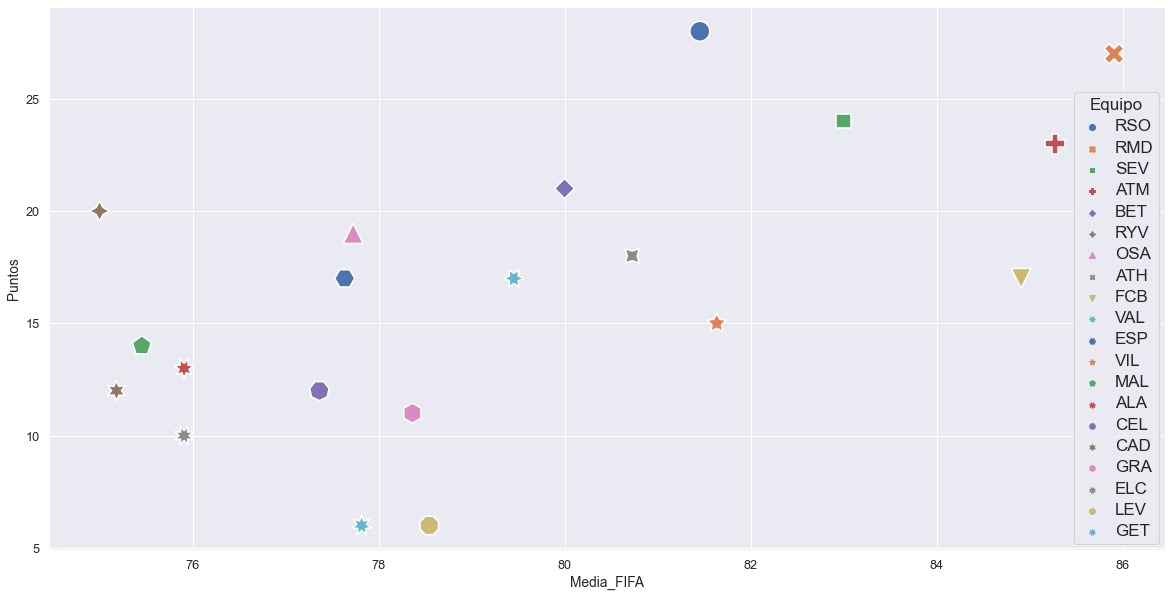

In [221]:
LL = sns.scatterplot(x="Media_FIFA", y="Puntos", hue="Equipo", style="Equipo", palette="deep",data=LaLiga, s=400, legend="full")
plt.setp(LL.get_legend().get_texts(), fontsize='17')
plt.setp(LL.get_legend().get_title(), fontsize='17')